## importing data and libraries : 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

x,labels = make_blobs(n_samples=300,centers=3,cluster_std=0.6,random_state=0)

df = pd.DataFrame({"f1":x[:,0],"f2":x[:,1]})

df

,f1,f2
0,0.428577,4.973997
1,1.619909,0.067645
2,1.432893,4.376792
3,-1.578462,3.034458
4,-1.658629,2.267460
...,...,...
295,0.007931,4.176143
296,-0.866733,3.696695
297,1.642565,0.169217
298,0.529417,3.807924


## visualizing data :

<Axes: xlabel='f1', ylabel='f2'>

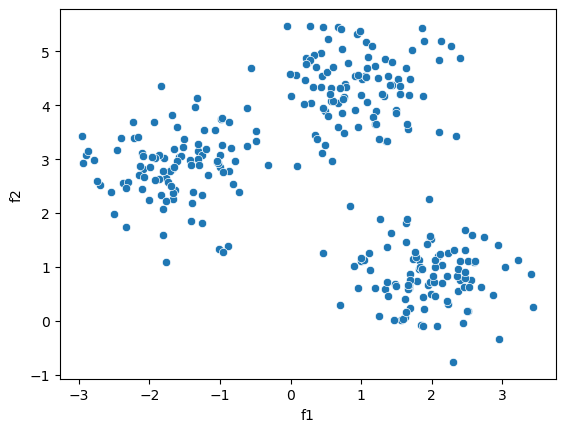

In [9]:
sns.scatterplot(df,x = "f1",y="f2)

## model trainnig :

In [49]:
db_model = DBSCAN(eps=0.5,min_samples=5)
db_model.fit(df[["f1","f2"]])
labels = db_model.labels_

labels

array([ 0,  1,  0,  2,  2,  2,  1,  0,  2,  2,  1,  1,  1,  0,  1,  2,  0,
        0,  2,  1,  2,  0,  1,  0,  2,  2,  0,  2,  1,  1,  2,  0,  0,  1,
        1,  2,  1, -1,  0,  1,  2,  1,  0,  1,  1,  2,  1, -1,  2,  1,  2,
        1,  2,  2,  1,  0,  0,  2,  2,  0,  1,  1,  0,  2,  1,  2,  0,  1,
        0,  1,  2,  2,  2,  2,  1,  0,  1,  2,  0,  0,  2,  0,  1,  0,  0,
        0,  1,  2,  0,  0,  2,  1,  2,  0,  1,  1,  0,  1,  2,  0,  1,  2,
        0,  1,  0,  0,  2,  0,  1,  1,  0,  2,  0,  0,  2,  2,  0,  0,  1,
        1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  2,  2,  2,  0,  2,  2,  1,
        2,  0,  2,  2,  1,  0,  1,  0,  2,  2,  0,  2,  2,  1,  0,  2,  0,
        1,  2,  2,  1,  1,  0,  1,  0,  0,  1,  0,  2,  0,  0,  0,  0,  2,
        1,  0,  2,  1,  1, -1,  0,  1,  0,  0,  1,  2,  0,  0,  0,  0,  1,
        2,  0,  2,  0,  0,  1,  1,  2,  0,  1,  2,  0,  2,  1,  2,  0,  2,
        1,  2,  0,  2,  0,  1,  0,  0,  2,  1,  1,  1,  1,  0, -1,  1,  0,
       -1,  1,  1,  0,  2

In [20]:
list(labels).count(-1)

12

In [22]:
df["labels"] = labels

In [24]:
df

,f1,f2,labels
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2
...,...,...,...
295,0.007931,4.176143,0
296,-0.866733,3.696695,2
297,1.642565,0.169217,1
298,0.529417,3.807924,0


In [28]:
df.labels.value_counts()

labels
 0    99
 1    96
 2    93
-1    12
Name: count, dtype: int64

## visualizing the data points according to the dbscan clusters :

<Axes: xlabel='f1', ylabel='f2'>

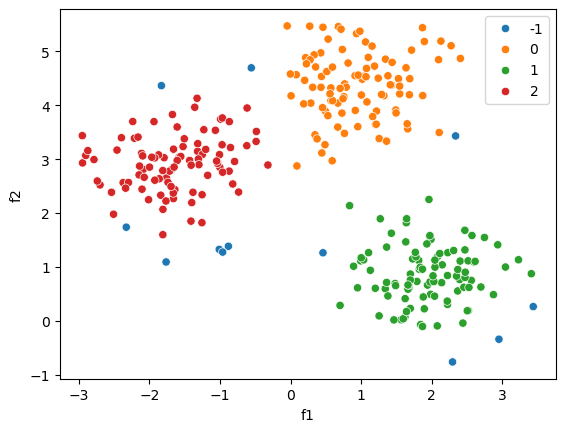

In [51]:
sns.scatterplot(df,x = "f1",y="f2",palette="tab10",hue=labels)

## exploring dbscan with the new dataset for Customer Segmentation :

In [54]:
data = pd.read_csv("C:/Users/Vaishnav/OneDrive/Desktop/Datasets/income.csv")
df = pd.DataFrame(data)
print(df.columns)

df.sample(6)

Index(['Name', 'Age', 'Income($)'], dtype='object')


,Name,Age,Income($)
8,Brad,36,156000
9,Angelina,35,130000
12,Arnold,27,48000
3,Ismail,28,60000
13,Jared,28,51000
7,Andrea,38,162000


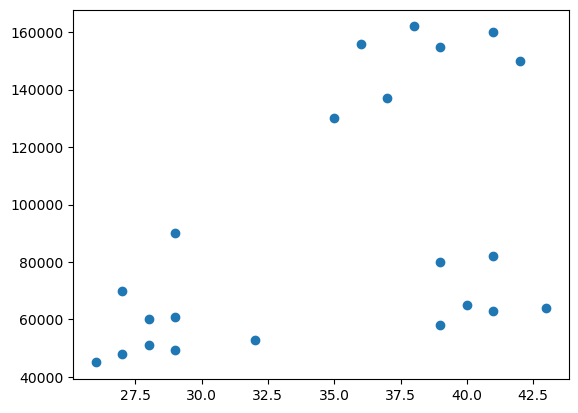

In [58]:
plt.scatter(df.Age,df['Income($)'])

### DBSCAN model training :

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age','Income($)']])

db_model_new = DBSCAN(eps=10,min_samples=5)
db_model_new.fit(scaled_data)
labels_pred = db_model_new.labels_

labels_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<Axes: xlabel='Age', ylabel='Income($)'>

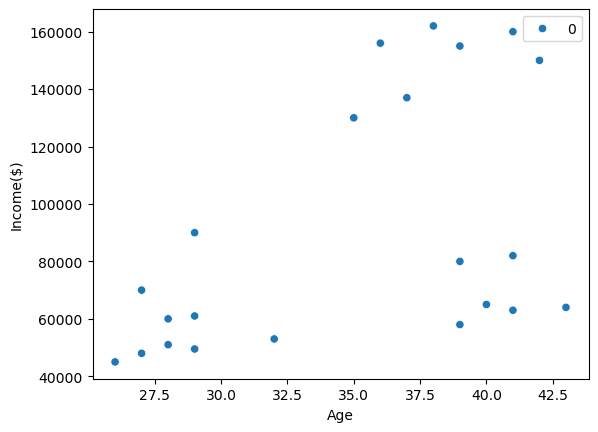

In [99]:
sns.scatterplot(data=df,x="Age",y="Income($)",palette="tab10",hue=labels_pred)